In [88]:
# Anil Kumar Ravuru
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
df = pd.read_csv('Final.csv')
df.head()

,name,description,message,fb_like,fb_angry,fb_thankful,fb_haha,fb_sad,fb_wow,fb_love,top_reaction_count,top_reaction,token_words,custom_token_words
0,This Korean Ad Hilariously Addresses The Power...,But how is this about the burger?,A proof that makeup and sorcery go hand in han...,1878,1,0,391,0,3,22,391,fb_haha,korean ad hilari address power makeup gag.tv,korean ad hilari address power makeup gag.tv
1,People Are Losing It For The Hiddle-Swift Split,Click to see the pic and write a comment...,My imaginary relationship with Tom Hiddleston ...,7606,5,0,1629,8,13,269,1629,fb_haha,peopl lose hiddl swift split,peopl lose hiddl swift split
2,"Sia Drops ""The Greatest"" Video Featuring 49 Da...",49 young dancers representing the 49 people lo...,Another amazing and breathtaking video from Si...,25304,6,0,95,44,367,2065,2065,fb_love,sia drop greatest video featur dancer pay trib...,sia drop greatest video featur dancer pay trib...
3,15 Tweets That Remind You Why You Need A Condo...,Click to see the pic and write a comment...,They also remind you how great your parents ar...,3452,2,0,607,0,1,62,607,fb_haha,tweet remind need condom readi,tweet remind need condom readi
4,Russian Topless Women Help Stop Speeding Drive...,Is it the breast idea ever?,"Not sure of if it will help, or cause more acc...",6454,12,0,1245,8,93,162,1245,fb_haha,russian topless woman help stop speed driver c...,russian topless woman help stop speed driver c...


In [89]:
reaction_order = ['fb_love', 'fb_haha', 'fb_wow', 'fb_sad', 'fb_angry']
df['top_reaction'] = df['top_reaction'].apply(lambda x: reaction_order.index(x))
features = df.token_words
actual_features = df.name
custom_features = df.custom_token_words
labels = df.top_reaction

In [90]:
print(df.groupby('top_reaction').count().name)

top_reaction
0    23615
1    18652
2    11575
3     7316
4     8359
Name: name, dtype: int64


In [91]:
from sklearn.model_selection import train_test_split
train_features, rest_features, train_labels, rest_labels = train_test_split(features, labels, test_size=.1, random_state=6848)
val_features, test_features, val_labels, test_labels = train_test_split(rest_features, rest_labels, test_size=.7, random_state=6848)

In [92]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from time import time
import numpy as np
from sklearn.metrics import accuracy_score

In [93]:
np.unique(train_labels)

array([0, 1, 2, 3, 4])

In [94]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print("-"*80)
    return accuracy, train_test_time

In [95]:

cvec = CountVectorizer()
lr = LogisticRegression(multi_class='ovr')
n_features = np.arange(3000, 30000, 3000)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print (classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, train_features, train_labels, val_features, val_labels)
        result.append((n,nfeature_accuracy,tt_time))
    return result

In [96]:
%%time
print("Unigram results without stopwords")
uwosw = nfeature_accuracy_checker()

Unigram results without stopwords
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Validation result for 3000 features
accuracy score: 54.20%
train and test time: 4.36s
--------------------------------------------------------------------------------
Validation result for 6000 features
accuracy score: 54.68%
train and test time: 4.19s
--------------------------------------------------------------------------------
Validation result for 9000 features
accuracy score: 56.07%
train and test time: 4.09s
--------------------------------------------------------------------------------
Validation result for 12000 features
accuracy score: 56.64%
train and test time: 4.52s
----------------------------------------------------

In [97]:
train_features, rest_features, train_labels, rest_labels = train_test_split(actual_features, labels, test_size=.1, random_state=6848)
val_features, test_features, val_labels, test_labels = train_test_split(rest_features, rest_labels, test_size=.7, random_state=6848)

In [98]:
%%time
print("Unigram results with stopwords")
uwsw = nfeature_accuracy_checker()

Unigram results with stopwords
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Validation result for 3000 features
accuracy score: 53.38%
train and test time: 6.85s
--------------------------------------------------------------------------------
Validation result for 6000 features
accuracy score: 55.11%
train and test time: 6.89s
--------------------------------------------------------------------------------
Validation result for 9000 features
accuracy score: 56.07%
train and test time: 6.81s
--------------------------------------------------------------------------------
Validation result for 12000 features
accuracy score: 56.31%
train and test time: 8.30s
-------------------------------------------------------

In [99]:
train_features, rest_features, train_labels, rest_labels = train_test_split(custom_features, labels, test_size=.1, random_state=6848)
val_features, test_features, val_labels, test_labels = train_test_split(rest_features, rest_labels, test_size=.7, random_state=6848)

In [100]:
%%time
print("Unigram results with custom stopwords")
ucsw = nfeature_accuracy_checker()

Unigram results with custom stopwords
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Validation result for 3000 features
accuracy score: 54.39%
train and test time: 4.43s
--------------------------------------------------------------------------------
Validation result for 6000 features
accuracy score: 54.68%
train and test time: 4.19s
--------------------------------------------------------------------------------
Validation result for 9000 features
accuracy score: 55.92%
train and test time: 5.78s
--------------------------------------------------------------------------------
Validation result for 12000 features
accuracy score: 56.40%
train and test time: 5.23s
------------------------------------------------

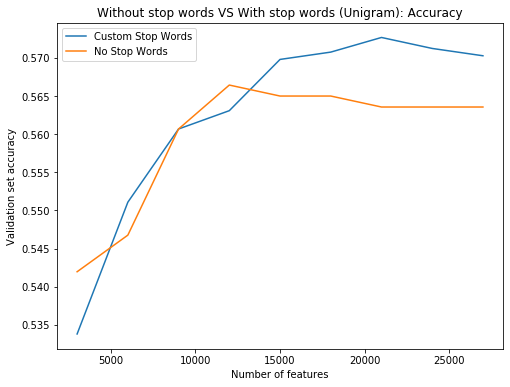

In [105]:
import matplotlib.pyplot as plt
nfeatures_plot_ug = pd.DataFrame(uwsw,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug_wosw = pd.DataFrame(uwosw,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='Custom Stop Words')
plt.plot(nfeatures_plot_ug_wosw.nfeatures, nfeatures_plot_ug_wosw.validation_accuracy,label='No Stop Words')
plt.title("Usage of Custom Stop Words")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [106]:
train_features, rest_features, train_labels, rest_labels = train_test_split(actual_features, labels, test_size=.1, random_state=6848)
val_features, test_features, val_labels, test_labels = train_test_split(rest_features, rest_labels, test_size=.7, random_state=6848)

In [107]:
%%time
print("Bigram results")
feature_result_bg = nfeature_accuracy_checker(ngram_range=(1, 2))

Bigram results with  Custom Stopwords
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Validation result for 3000 features
accuracy score: 54.05%
train and test time: 9.50s
--------------------------------------------------------------------------------
Validation result for 6000 features
accuracy score: 55.01%
train and test time: 10.06s
--------------------------------------------------------------------------------
Validation result for 9000 features
accuracy score: 56.59%
train and test time: 10.45s
--------------------------------------------------------------------------------
Validation result for 12000 features
accuracy score: 57.22%
train and test time: 10.48s
---------------------------------------------

In [108]:
%%time
print("Bigram results")
feature_result_tg = nfeature_accuracy_checker(ngram_range=(1, 3))

Bigram results
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Validation result for 3000 features
accuracy score: 53.91%
train and test time: 14.43s
--------------------------------------------------------------------------------
Validation result for 6000 features
accuracy score: 55.25%
train and test time: 12.18s
--------------------------------------------------------------------------------
Validation result for 9000 features
accuracy score: 56.83%
train and test time: 13.60s
--------------------------------------------------------------------------------
Validation result for 12000 features
accuracy score: 57.70%
train and test time: 14.12s
-------------------------------------------------------------------

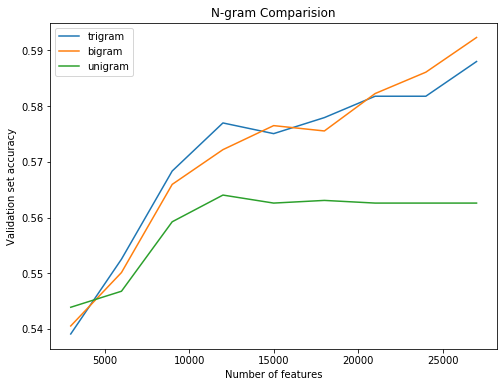

In [110]:
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(ucsw,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram')
plt.title("N-gram Comparision")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [112]:
print("Bigram results")
feature_result_tg = nfeature_accuracy_checker(ngram_range=(1, 3), n_features=np.arange(5000, 50000, 5000))

Bigram results
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Validation result for 5000 features
accuracy score: 54.05%
train and test time: 12.87s
--------------------------------------------------------------------------------
Validation result for 10000 features
accuracy score: 56.74%
train and test time: 12.85s
--------------------------------------------------------------------------------
Validation result for 15000 features
accuracy score: 57.51%
train and test time: 13.22s
--------------------------------------------------------------------------------
Validation result for 20000 features
accuracy score: 58.13%
train and test time: 13.42s
-----------------------------------------------------------------

In [113]:
feature_result_bg = nfeature_accuracy_checker(ngram_range=(1, 2), n_features=np.arange(5000, 50000, 5000))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Validation result for 5000 features
accuracy score: 54.48%
train and test time: 8.42s
--------------------------------------------------------------------------------
Validation result for 10000 features
accuracy score: 56.98%
train and test time: 10.07s
--------------------------------------------------------------------------------
Validation result for 15000 features
accuracy score: 57.65%
train and test time: 11.52s
--------------------------------------------------------------------------------
Validation result for 20000 features
accuracy score: 58.23%
train and test time: 12.90s
--------------------------------------------------------------------------------


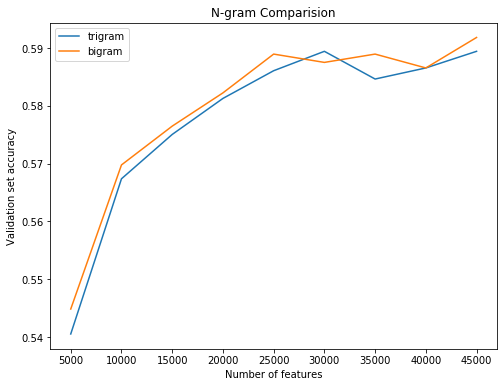

In [114]:
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ug = pd.DataFrame(ucsw,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram')
plt.title("N-gram Comparision")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()